In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os.path as op

In [3]:
from AFQ import api

In [4]:
import AFQ.data as afd
import AFQ.viz as afv

In [5]:
afd.organize_stanford_data()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/stanford_hardi 


In [6]:
base_dir = op.join(op.expanduser('~'), 'AFQ_data', 'stanford_hardi')

In [7]:
op.join(afd.afq_home, 'stanford_hard')

'/Users/arokem/AFQ_data/stanford_hard'

In [8]:
myafq = api.AFQ(preproc_path=op.join(afd.afq_home, 'stanford_hardi'), sub_prefix='sub')

In [9]:
myafq.data_frame

,anat_file,bval_file,bvec_file,dwi_file,seg_file,sess,subject,gtab,dwi_affine
0,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,sub-01,<dipy.core.gradients.GradientTable object at 0...,"[[2.0, 0.0, 0.0, -80.0], [0.0, 2.0, 0.0, -120...."


In [10]:
myafq.brain_mask

0    /Users/arokem/AFQ_data/stanford_hardi/sub-01/s...
Name: brain_mask_file, dtype: object

In [11]:
import nibabel as nib

In [12]:
dti_img = nib.load(myafq.dti[0])
dti_data = dti_img.get_data()

In [13]:
myafq['gtab']

0    <dipy.core.gradients.GradientTable object at 0...
Name: gtab, dtype: object

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/AFQ_data/templates 
Data size is approximately 70MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/mni_template 
Segmenting: SLF_L
Segmenting: ATR_R
Segmenting: CST_L
Segmenting: ARC_L
Segmenting: IFO_R
Segmenting: CGC_L
Segmenting: UNC_L
Segmenting: HCC_L
Segmenting: ILF_R
Segmenting: CGC_R
Segmenting: IFO_L
Segmenting: HCC_R
Segmenting: CST_R
Segmenting: ATR_L
Segmenting: ARC_R
Segmenting: SLF_R
Segmenting: UNC_R
Segmenting: ILF_L


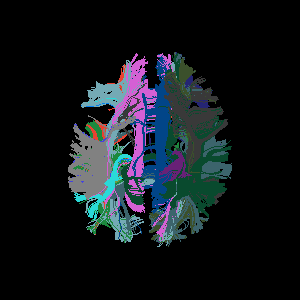

In [14]:
ren = afv.visualize_bundles(myafq.bundles[0])